<a href="https://colab.research.google.com/github/BuczynskiRafal/ML/blob/main/supervised/04_model_selection/01_underfitting_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Podział na zbiór treningowy i testowy](#3)
5. [Wizualizacja zbioru treningowego i testowego](#4)
6. [Niedouczenie - Regresja Logistyczna](#5)
7. [Niedouczenie - Drzewa Decyzyjne](#6)
8. [Przykład przeuczenia](#7)


### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### <a name='1'></a> Wygenerowanie danych

In [10]:
raw_data = make_moons(n_samples=5000, noise=0.3, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 0.26279348  1.20967929]
 [ 0.08942439 -0.03610362]
 [ 0.07904712  0.37332342]
 [ 0.18249245  1.16014546]
 [ 0.96886726  0.52920609]]

[0 1 1 0 0]


In [11]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,0.262793,1.209679,0.0
1,0.089424,-0.036104,1.0
2,0.079047,0.373323,1.0
3,0.182492,1.160145,0.0
4,0.968867,0.529206,0.0


### <a name='2'></a> Wizualizacja danych

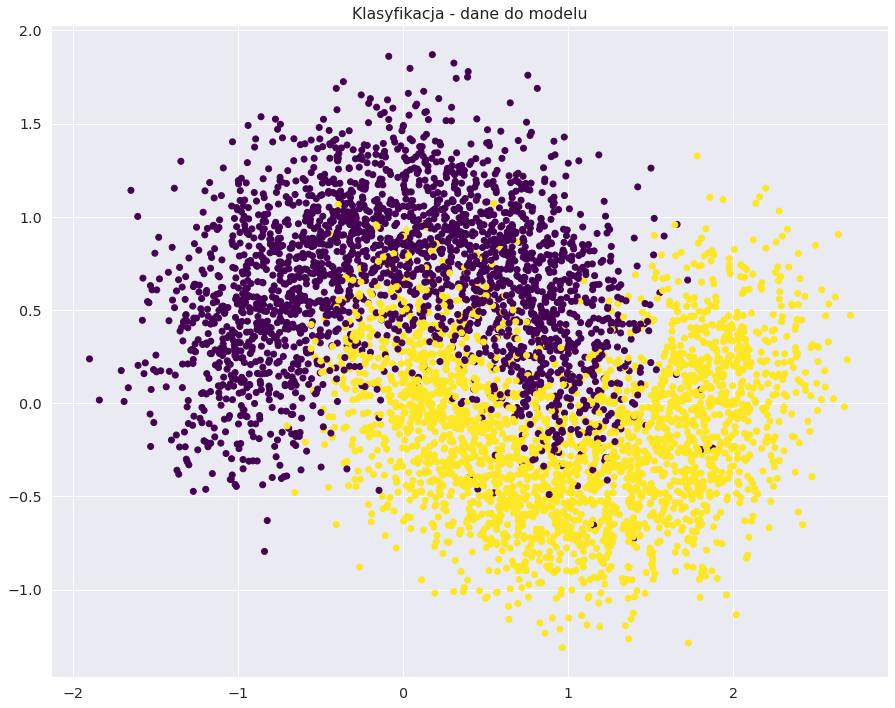

In [12]:
plt.figure(figsize=(15, 12))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

### <a name='3'></a> Podział na zbiór treningowy i testowy

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3500, 2)
X_test shape: (1500, 2)
y_train shape: (3500,)
y_test shape: (1500,)


### <a name='4'></a> Wizualizacja zbioru treningowego i testowego

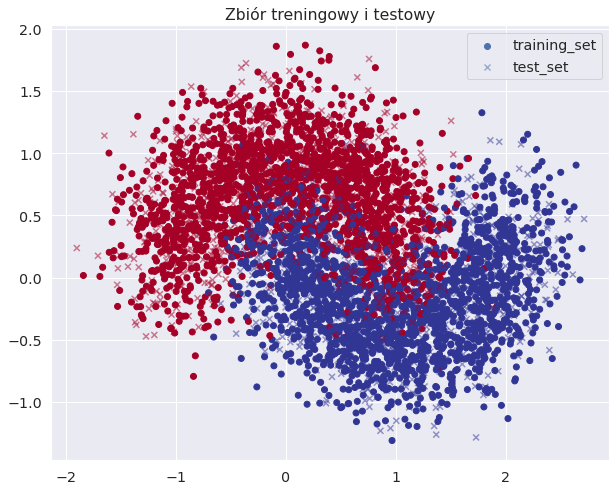

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

### <a name='5'></a> Niedouczenie - Regresja Logistyczna

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Zbiór treningowy

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


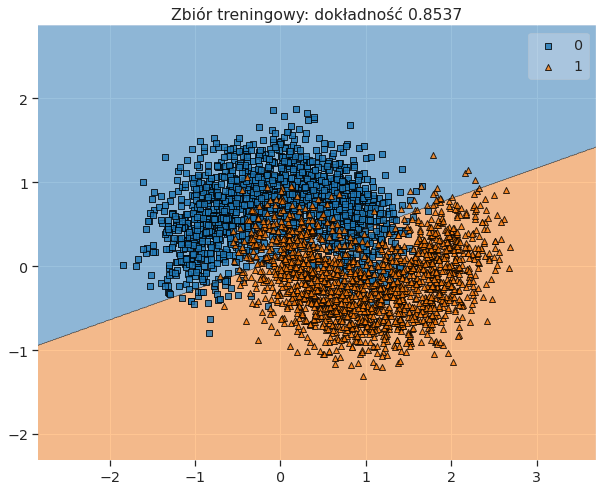

In [16]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

Zbiór testowy

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


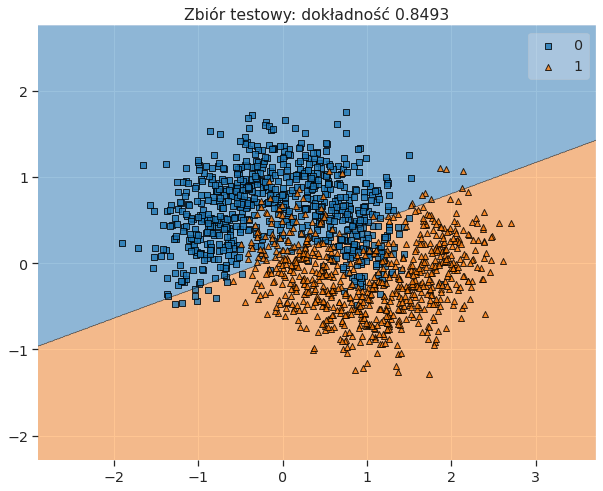

In [17]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='6'></a> Niedouczenie - Drzewa Decyzyjne

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


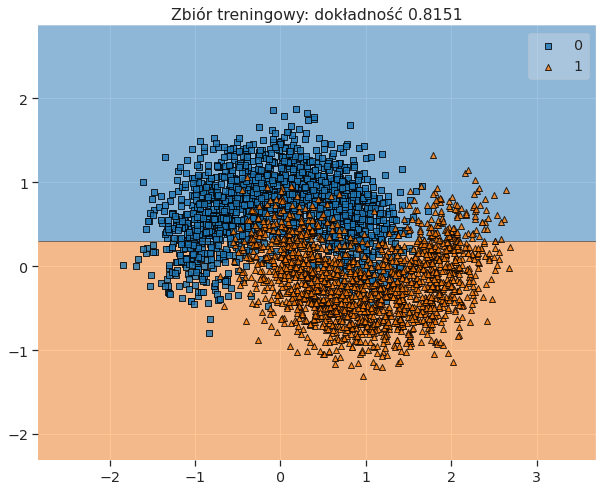

In [18]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1)
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


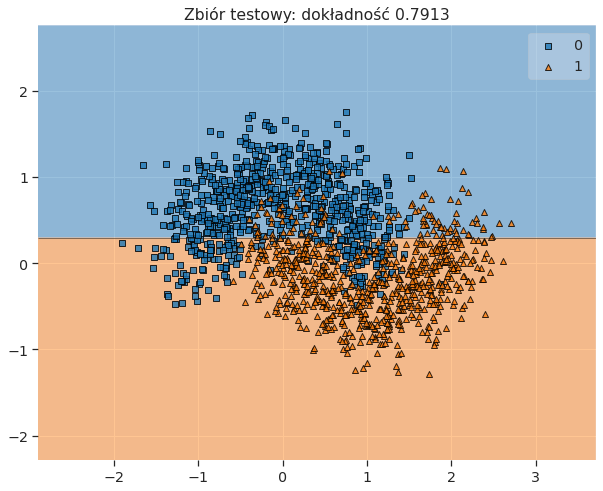

In [19]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='7'></a> Przykład przeuczenia

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


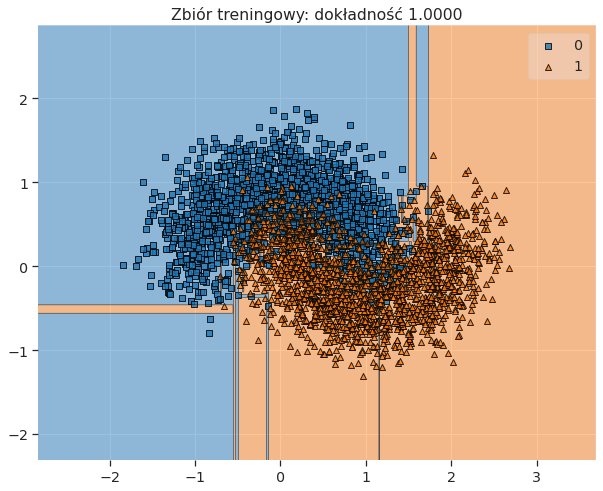

In [20]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


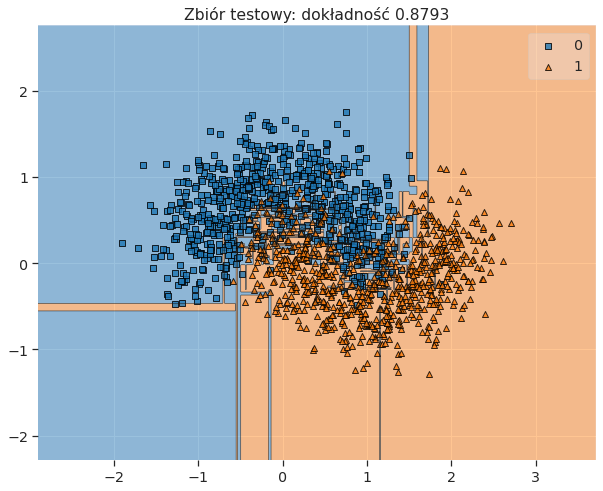

In [21]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()